In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('digit-recognizer/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
Y_train

array([4, 9, 5, ..., 2, 7, 4], dtype=int64)

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def sigmoid(self, x, derivative=False):
        '''
            Forward path:
            σ(x) = 1 / 1+exp(-z)
            
            Backward path:
            ∇σ(x) = exp(-z) / (1+exp(-z))^2
        '''
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))
def tanh(self, x, derivative=False):
        '''
            Forward path:
            tanh(x) = 2σ(2x) - 1
            
            Backward path:
            ∇tanh(x) = 1 - tanh(x)^2
        '''
        if derivative:
            return 1 - (np.tanh(x)**2)
        return 2/(1 + np.exp(-2*x)) - 1

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500) update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): b1, W2, b2, dW1, db1, dW2, db2, alpha):

Iteration:  0
[5 5 4 ... 5 0 5] [4 9 5 ... 2 7 4]
0.11909756097560975
Iteration:  10
[3 3 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.2491219512195122
Iteration:  20
[4 3 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.3348780487804878
Iteration:  30
[4 3 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.40641463414634144
Iteration:  40
[4 9 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.460609756097561
Iteration:  50
[4 9 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.5073658536585366
Iteration:  60
[4 9 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.5469756097560976
Iteration:  70
[4 9 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.5863658536585366
Iteration:  80
[4 9 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.6207560975609756
Iteration:  90
[4 9 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.6500487804878049
Iteration:  100
[4 9 4 ... 2 7 4] [4 9 5 ... 2 7 4]
0.6732439024390244
Iteration:  110
[4 9 0 ... 2 7 4] [4 9 5 ... 2 7 4]
0.6943414634146341
Iteration:  120
[4 9 0 ... 2 7 4] [4 9 5 ... 2 7 4]
0.711390243902439
Iteration:  130
[4 9 0 ... 2 7 4] [4 9 5 ... 2 7 4]
0.7250975609756097
Iteration:  140
[

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


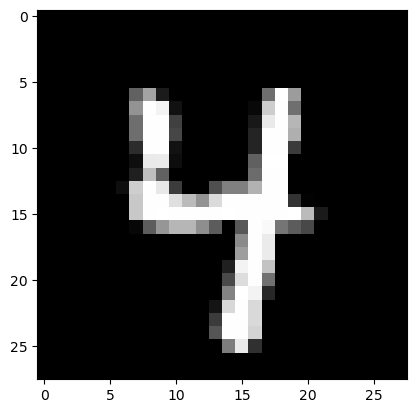

Prediction:  [9]
Label:  9


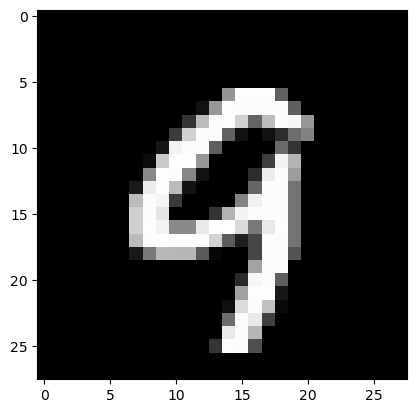

Prediction:  [0]
Label:  5


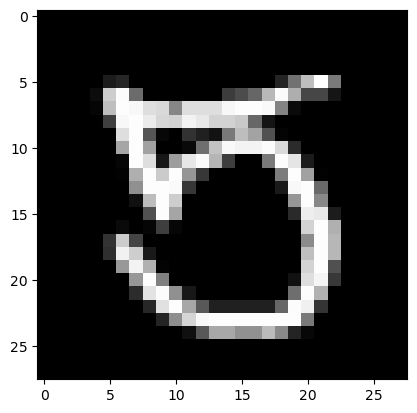

Prediction:  [1]
Label:  1


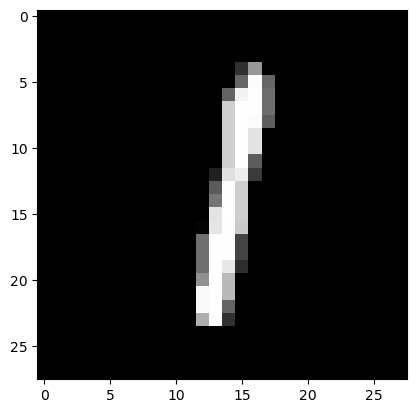

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 6 0 9 5 1 9 1 0 5 5 0 4 2 6 1 6 5 6 7 8 1 8 5 9 6 2 5 0 3 4 0 2 7 9 5 8
 8 6 7 7 4 4 6 3 2 2 9 6 3 6 9 2 1 6 2 9 0 5 9 4 8 0 1 9 9 9 6 2 3 6 8 0 4
 9 5 5 9 8 1 2 5 6 7 7 6 3 0 6 5 8 8 5 5 0 0 1 7 1 4 3 1 5 4 9 1 2 0 0 6 6
 7 7 5 0 1 8 8 3 6 3 2 3 5 9 6 6 7 3 0 2 6 7 9 0 9 8 7 7 9 5 5 6 1 7 2 3 4
 6 1 7 3 1 8 4 3 9 0 7 9 1 8 5 8 3 4 3 4 4 4 1 3 9 4 6 8 2 6 2 1 3 0 3 4 4
 6 6 5 6 8 5 5 6 7 6 3 2 1 7 1 6 7 9 0 5 6 1 7 1 6 1 7 0 1 9 6 1 9 4 1 2 5
 8 8 7 3 9 7 3 9 1 8 3 6 2 9 8 6 8 4 2 4 4 4 8 1 1 2 2 9 2 7 8 3 4 3 9 9 8
 1 7 9 5 9 5 3 1 6 7 9 9 7 3 5 2 2 9 0 8 8 1 7 1 2 1 0 0 7 3 7 8 6 2 9 3 7
 4 6 6 7 7 9 6 8 4 2 1 0 2 0 3 3 1 3 9 1 1 5 4 9 0 6 8 1 6 7 4 4 6 6 9 9 8
 4 7 6 1 4 2 4 1 3 0 3 1 2 0 4 8 7 5 1 3 1 7 8 0 7 4 3 9 6 3 0 3 9 5 6 9 1
 2 2 2 7 0 8 0 1 3 0 9 9 3 2 7 7 6 0 2 1 2 2 2 6 5 7 5 8 1 5 3 6 3 2 4 7 5
 2 9 8 6 1 6 9 4 1 6 6 1 9 2 8 4 1 1 3 1 8 8 2 6 1 4 3 6 0 9 5 6 2 9 1 4 0
 5 6 1 1 4 1 7 4 1 4 1 3 3 7 0 8 3 2 9 6 8 3 9 7 4 1 7 0 6 0 7 6 3 8 0 8 0
 4 5 4 1 2 7 0 7 8 4 3 1 

0.828